Test Marks : [58, 20]
Predicted class : [1 0]
Probabilities for Marks 58: 0.02 0.98
Probabilities for Marks 20: 1.00 0.00
Accuracy score : 100.00%
Confusion Matrix : 
 [[4 0]
 [0 8]]


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


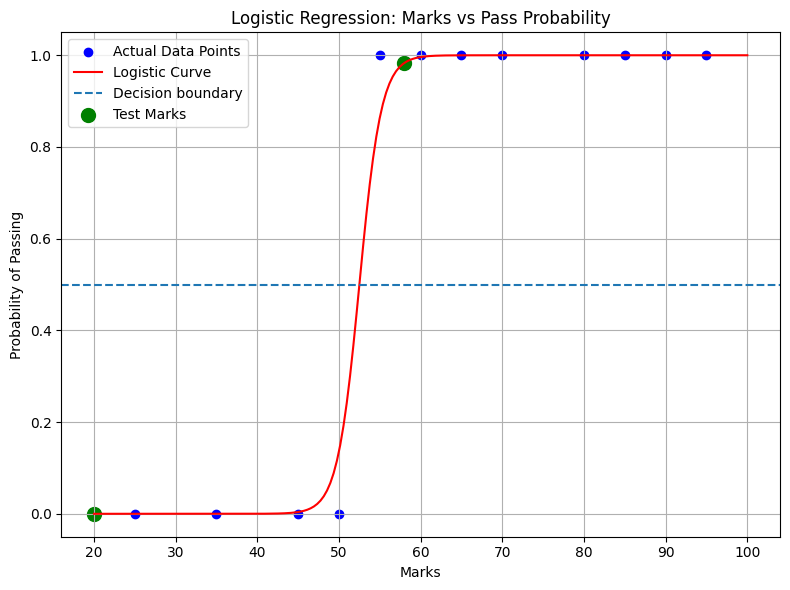

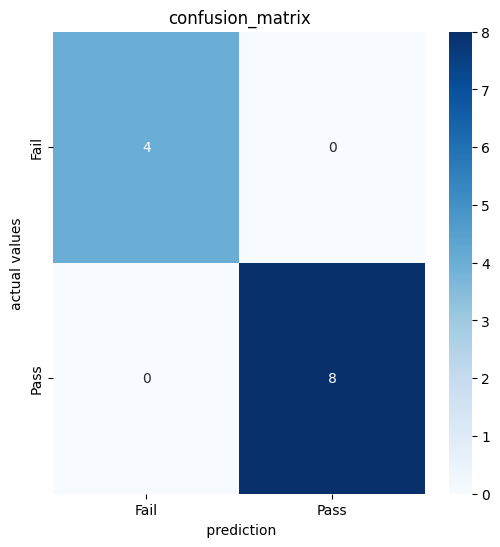

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#create dataset
data = pd.DataFrame({
    'Marks' : [25, 35, 45, 50, 55, 60, 65, 70, 80, 85, 90, 95],
    'Result' : [0,0,0,0,1,1,1,1,1,1,1,1]
})

x = data[['Marks']]
y = data['Result']

model = LogisticRegression()
model.fit(x,y)

#make predictions on training data
y_pred = model.predict(x)

test_data = pd.DataFrame({'Marks' : [58, 20]})
test_pred = model.predict(test_data)
test_prob = model.predict_proba(test_data)

print(f"Test Marks : {list(test_data['Marks'])}")
print(f"Predicted class : {test_pred}")
for i in range(len(test_data)):
    probs = ' '.join([f"{p:.2f}" for p in test_prob[i]])
    print(f"Probabilities for Marks {test_data.iloc[i,0]}: {probs}")

acc = accuracy_score(y,y_pred)
cm = confusion_matrix(y,y_pred)
print(f"Accuracy score : {acc*100:.2f}%")
print("Confusion Matrix : \n", cm)

#plotting logistic curve
x_vals = np.linspace(20,100,200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:,1]
plt.figure(figsize=(8,6))
plt.scatter(x,y, color="Blue", label = "Actual Data Points")
plt.plot(x_vals, y_prob, color = "red", label = "Logistic Curve" )
plt.axhline(0.5, linestyle='--', label = "Decision boundary")
plt.scatter(test_data['Marks'], test_prob[:, 1], color='green', s=100, label='Test Marks')
plt.title('Logistic Regression: Marks vs Pass Probability')
plt.xlabel('Marks')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,6))
sns.heatmap(cm , annot=True,cmap = "Blues", fmt = "d", xticklabels= ['Fail','Pass'], yticklabels=[ 'Fail', 'Pass'])
plt.title("confusion_matrix")
plt.xlabel(" prediction")
plt.ylabel("actual values")
plt.show()